#<b><center>EDA review-Pennsylvania</b></center>

Importacion de librerías

In [1]:
from google.colab import drive
import pandas as pd
import seaborn as sns
import os
import json

Montando carpeta drive.

In [5]:
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
%cd /content/drive/MyDrive/datalake/reviews-estados/review-Pennsylvania
archivos = os.listdir()
df = pd.DataFrame()
for archivo in archivos:
    if archivo.endswith('.json'):  # Puedes ajustar la extensión según tus necesidades
        print('Cargando data ',archivo,'...')
        data = pd.read_json(archivo, lines=True)
        #df.append(data)
        df = pd.concat([df, data], axis=0)


/content/drive/MyDrive/datalake/reviews-estados/review-Pennsylvania
Cargando data  15.json ...
Cargando data  13.json ...
Cargando data  2.json ...
Cargando data  14.json ...
Cargando data  16.json ...
Cargando data  12.json ...
Cargando data  11.json ...
Cargando data  3.json ...
Cargando data  1.json ...
Cargando data  10.json ...
Cargando data  4.json ...
Cargando data  5.json ...
Cargando data  6.json ...
Cargando data  9.json ...
Cargando data  7.json ...
Cargando data  8.json ...


Se verifica el tipo de variable de cada columna en caso sea necesario cambiarlo.

In [7]:
df.info()
df.head(5)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2400000 entries, 0 to 149999
Data columns (total 8 columns):
 #   Column   Dtype  
---  ------   -----  
 0   user_id  float64
 1   name     object 
 2   time     int64  
 3   rating   int64  
 4   text     object 
 5   pics     object 
 6   resp     object 
 7   gmap_id  object 
dtypes: float64(1), int64(2), object(5)
memory usage: 164.8+ MB


,user_id,name,time,rating,text,pics,resp,gmap_id
0,1.023762e+20,Bo Lottig,1605215315642,5,None,None,None,0x89cb403dccee5345:0x498030b8be38e6da
1,1.150407e+20,Jayleen Lawson,1604071628355,5,None,None,None,0x89cb403dccee5345:0x498030b8be38e6da
2,1.170220e+20,Richard Naugle,1614800202838,5,"Very knowledgeable, very helpful. Great place...",None,None,0x89c8c1a20671e5d5:0x1ca654f3761c121a
3,1.147554e+20,William Rosner,1619084783909,5,One of the best selections of vape juice and t...,None,None,0x89c8c1a20671e5d5:0x1ca654f3761c121a
4,1.014546e+20,Lee Eledge,1613063950115,5,Great and friendly place. Interesting discoun...,None,None,0x89c8c1a20671e5d5:0x1ca654f3761c121a


In [8]:
df['user_id'] = df['user_id'].astype(object)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2400000 entries, 0 to 149999
Data columns (total 8 columns):
 #   Column   Dtype 
---  ------   ----- 
 0   user_id  object
 1   name     object
 2   time     int64 
 3   rating   int64 
 4   text     object
 5   pics     object
 6   resp     object
 7   gmap_id  object
dtypes: int64(2), object(6)
memory usage: 164.8+ MB


<b>Filtrado de columnas</b>

Se selecciona solo las columnas que pueden contener información relevante para el análisis.
- "pics" : no se realiza un análisis de imágenes
- "resp": son respuestas de los desarrolladores, generalmente de agredecimiento de los comentarios.

In [9]:
df_analisis = df[['user_id','name','time','rating','text','gmap_id']]
df_analisis.head()

,user_id,name,time,rating,text,gmap_id
0,102376163680081215488.0,Bo Lottig,1605215315642,5,None,0x89cb403dccee5345:0x498030b8be38e6da
1,115040693285635391488.0,Jayleen Lawson,1604071628355,5,None,0x89cb403dccee5345:0x498030b8be38e6da
2,117022003176866267136.0,Richard Naugle,1614800202838,5,"Very knowledgeable, very helpful. Great place...",0x89c8c1a20671e5d5:0x1ca654f3761c121a
3,114755415607572250624.0,William Rosner,1619084783909,5,One of the best selections of vape juice and t...,0x89c8c1a20671e5d5:0x1ca654f3761c121a
4,101454552174109032448.0,Lee Eledge,1613063950115,5,Great and friendly place. Interesting discoun...,0x89c8c1a20671e5d5:0x1ca654f3761c121a


<b>Analizando las columnas numéricas</b>
- "time" se entiende como el número de registro.
- "rating" es la puntuación del usuario de 1 a 5, su variación se encuentra en ese rango

In [10]:
df_analisis.describe()

,time,rating
count,2.400000e+06,2.400000e+06
mean,1.553453e+12,4.345731e+00
std,4.188404e+10,1.091626e+00
min,6.626016e+11,1.000000e+00
25%,1.526765e+12,4.000000e+00
50%,1.555872e+12,5.000000e+00
75%,1.581711e+12,5.000000e+00
max,1.631133e+12,5.000000e+00


<b>Filtros complementarios</b>

Posibles duplicados y nulos. El uso de memoria se reduce a 60.8 Mb

In [11]:
df_analisis.dropna(inplace=True)
df_analisis.drop_duplicates(inplace=True)
df_analisis.reset_index(drop=True,inplace=True)
df_analisis.info()
df_analisis.head(5)

<ipython-input-11-d87d968368bb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_analisis.dropna(inplace=True)
<ipython-input-11-d87d968368bb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_analisis.drop_duplicates(inplace=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1328047 entries, 0 to 1328046
Data columns (total 6 columns):
 #   Column   Non-Null Count    Dtype 
---  ------   --------------    ----- 
 0   user_id  1328047 non-null  object
 1   name     1328047 non-null  object
 2   time     1328047 non-null  int64 
 3   rating   1328047 non-null  int64 
 4   text     1328047 non-null  object
 5   gmap_id  1328047 non-null  object
dtypes: int64(2), object(4)
memory usage: 60.8+ MB


,user_id,name,time,rating,text,gmap_id
0,117022003176866267136.0,Richard Naugle,1614800202838,5,"Very knowledgeable, very helpful. Great place...",0x89c8c1a20671e5d5:0x1ca654f3761c121a
1,114755415607572250624.0,William Rosner,1619084783909,5,One of the best selections of vape juice and t...,0x89c8c1a20671e5d5:0x1ca654f3761c121a
2,101454552174109032448.0,Lee Eledge,1613063950115,5,Great and friendly place. Interesting discoun...,0x89c8c1a20671e5d5:0x1ca654f3761c121a
3,111146921385491660800.0,Joey Sweitzer,1618428828294,5,Friendliest staff and a huge selection of vape...,0x89c8c1a20671e5d5:0x1ca654f3761c121a
4,102778010335085068288.0,Osrs Karnage,1615671108283,5,"My new go to for vape supplies, the people kno...",0x89c8c1a20671e5d5:0x1ca654f3761c121a


La media indica un valor de 4.34 puntos, lo que habla muy bien de los locales en Florida con 1.33 millones de reviews de respaldo.

In [12]:
df_analisis.describe()

,time,rating
count,1.328047e+06,1.328047e+06
mean,1.552454e+12,4.339158e+00
std,4.391915e+10,1.164619e+00
min,6.626016e+11,1.000000e+00
25%,1.524700e+12,4.000000e+00
50%,1.555096e+12,5.000000e+00
75%,1.582845e+12,5.000000e+00
max,1.631128e+12,5.000000e+00


<b>Pairplot</b>

La puntuación es discreta entre 1 y 5. En el gráfico "rating" vs "time" se observa que los primeros reviews fueron pocos y con una tendencia en 4 puntos; sin embargo, el gráfico no ayuda a distinguir las siguientes puntuaciones.

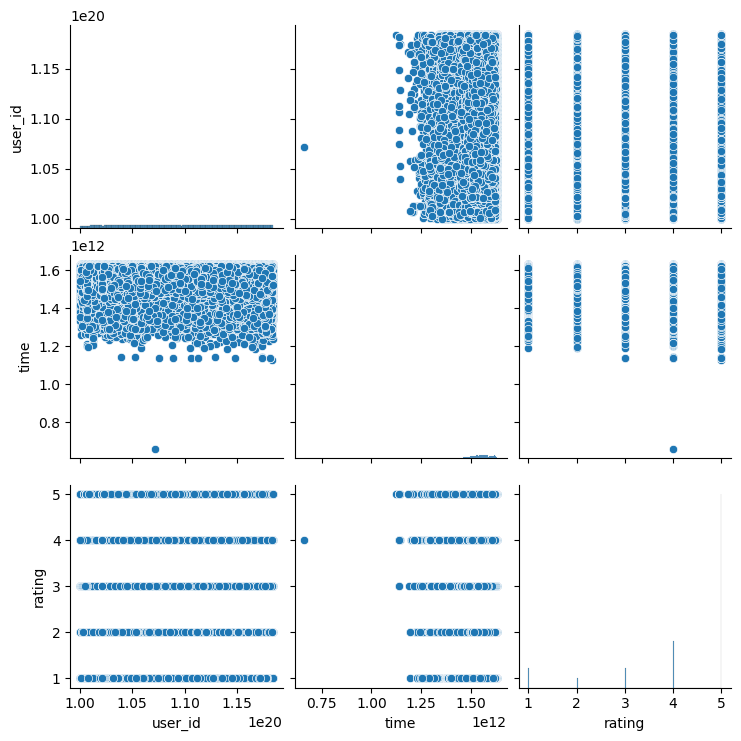

In [13]:
sns.pairplot(df_analisis)

La columna 'time' no tiene mayor uso que este análisis, para ahorrar memoria se descartará

In [14]:
df_analisis.drop(columns=['time'],inplace=True)
df_analisis.drop_duplicates(inplace=True)
df_analisis.reset_index(drop=True,inplace=True)

<ipython-input-14-f97d05965a14>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_analisis.drop(columns=['time'],inplace=True)
<ipython-input-14-f97d05965a14>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_analisis.drop_duplicates(inplace=True)


In [15]:
df_analisis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1328047 entries, 0 to 1328046
Data columns (total 5 columns):
 #   Column   Non-Null Count    Dtype 
---  ------   --------------    ----- 
 0   user_id  1328047 non-null  object
 1   name     1328047 non-null  object
 2   rating   1328047 non-null  int64 
 3   text     1328047 non-null  object
 4   gmap_id  1328047 non-null  object
dtypes: int64(1), object(4)
memory usage: 50.7+ MB


Dividiendo en dataframes más pequeños y guardando lo obtenido:



In [16]:
users = df_analisis[['user_id','name']]
users.drop_duplicates(inplace=True)
users.reset_index(drop=True,inplace=True)
users.info()

<ipython-input-16-399b2f488d99>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  users.drop_duplicates(inplace=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320308 entries, 0 to 320307
Data columns (total 2 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   user_id  320308 non-null  object
 1   name     320308 non-null  object
dtypes: object(2)
memory usage: 4.9+ MB


In [17]:
ratings = df_analisis[['user_id','gmap_id','rating']]
ratings.drop_duplicates(inplace=True)
ratings.reset_index(drop=True,inplace=True)
ratings.info()

<ipython-input-17-5649e09075a0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ratings.drop_duplicates(inplace=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1327980 entries, 0 to 1327979
Data columns (total 3 columns):
 #   Column   Non-Null Count    Dtype 
---  ------   --------------    ----- 
 0   user_id  1327980 non-null  object
 1   gmap_id  1327980 non-null  object
 2   rating   1327980 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 30.4+ MB


In [18]:
reviews = df_analisis[['user_id','gmap_id','text']]
ratings.drop_duplicates(inplace=True)
ratings.reset_index(drop=True,inplace=True)
ratings.info()

<ipython-input-18-291d10382b00>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ratings.drop_duplicates(inplace=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1327980 entries, 0 to 1327979
Data columns (total 3 columns):
 #   Column   Non-Null Count    Dtype 
---  ------   --------------    ----- 
 0   user_id  1327980 non-null  object
 1   gmap_id  1327980 non-null  object
 2   rating   1327980 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 30.4+ MB


In [19]:
users.to_parquet('users.parquet')
ratings.to_parquet('ratings.parquet')
reviews.to_parquet('reviews.parquet')